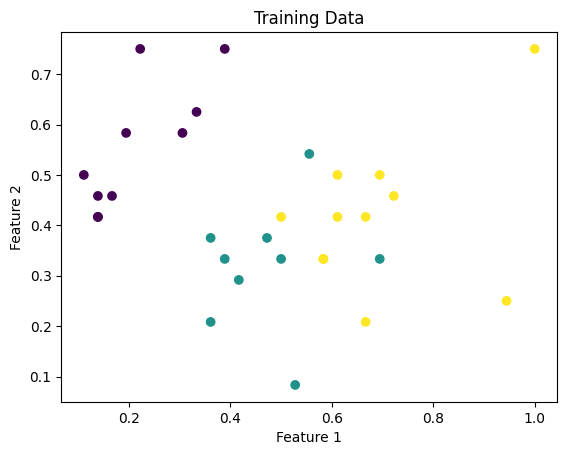

Predictions: 0 actual: 0
Predictions: 2 actual: 2
Predictions: 1 actual: 2
Predictions: 0 actual: 0
Predictions: 0 actual: 0
Predictions: 0 actual: 0
Accuracy: 0.83


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

np.random.seed(42)
random_indices = np.random.choice(X.shape[0], size=30, replace=False)
X_train = X_scaled[random_indices]
y_train = y[random_indices]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.title("Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

deleted_X = np.delete(X_scaled, random_indices, axis=0)
deleted_y = np.delete(y, random_indices)

rand_ind_test = np.random.choice(deleted_X.shape[0], size=6, replace=False)
X_test = deleted_X[rand_ind_test]
y_test = deleted_y[rand_ind_test]

class KNN:
    def __init__(self, k):
        self.k = k

    def euclidean_dist(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _predict(self, X_test):
        distances = [self.euclidean_dist(X_test, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        k_most = Counter(k_labels).most_common(1)
        return k_most[0][0]

    def predict(self, X_test):
        predictions = [self._predict(x_test) for x_test in X_test]
        return np.array(predictions)

    def accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        return accuracy

knn_classifier = KNN(k=3)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)

for i in range(len(X_test)):
  print("Predictions:", predictions[i],"actual:",y_test[i])
accuracy_score = knn_classifier.accuracy(X_test, y_test)
print(f"Accuracy: {accuracy_score:.2f}")
